This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Quick-view a RHI sweep in polar or cartesian reference systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wradlib as wrl
import wradlib_data
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Read a RHI polar data set from University Bonn XBand radar

In [2]:
filename = wradlib_data.DATASETS.fetch("hdf5/2014-06-09--185000.rhi.mvol")
data1, metadata = wrl.io.read_gamic_hdf5(filename)
img = data1["SCAN0"]["ZH"]["data"]
# mask data array for better presentation
mask_ind = np.where(img <= np.nanmin(img))
img[mask_ind] = np.nan
img = np.ma.array(img, mask=np.isnan(img))

r = metadata["SCAN0"]["r"]
th = metadata["SCAN0"]["el"]
print(th.shape)
az = metadata["SCAN0"]["az"]
site = (
    metadata["VOL"]["Longitude"],
    metadata["VOL"]["Latitude"],
    metadata["VOL"]["Height"],
)
img = wrl.georef.create_xarray_dataarray(
    img, r=r, phi=az, theta=th, site=site, dim0="elevation", sweep_mode="rhi"
)
img

(450,)


<xarray.DataArray (elevation: 450, range: 667)> Size: 1MB
array([[  4.3487625,  15.684074 ,  14.629356 , ..., 128.00293  ,
        128.00293  , 128.00293  ],
       [  3.7921066,  15.830559 ,  13.624435 , ..., 128.00293  ,
        128.00293  , 128.00293  ],
       [  3.8712082,  15.754387 ,  12.074585 , ..., 128.00293  ,
        128.00293  , 128.00293  ],
       ...,
       [  4.471817 ,  16.114746 ,  14.95163  , ..., 128.00293  ,
        128.00293  , 128.00293  ],
       [  4.694481 ,  15.72802  ,  14.397903 , ..., 128.00293  ,
        128.00293  , 128.00293  ],
       [  4.9376526,  16.059082 ,  14.227974 , ..., 128.00293  ,
        128.00293  , 128.00293  ]], shape=(450, 667), dtype=float32)
Coordinates:
  * range       (range) float64 5kB 75.0 150.0 225.0 ... 4.995e+04 5.002e+04
    azimuth     (elevation) float64 4kB 225.0 225.0 225.0 ... 225.0 225.0 225.0
  * elevation   (elevation) float64 4kB 0.2 0.3 0.5 0.7 ... 89.3 89.5 89.7 89.9
    longitude   float64 8B 7.072
    latitude    float64 8B 50.73
    altitude    float64 8B 99.5
    sweep_mode  <U3 12B 'rhi'

Inspect the data set a little

In [3]:
print("Shape of polar array: %r\n" % (img.shape,))
print("Some meta data of the RHI file:")
print("\tdatetime: %r" % (metadata["SCAN0"]["Time"],))

Shape of polar array: (450, 667)

Some meta data of the RHI file:
	datetime: '2014-06-09T18:50:01.000Z'


## The simplest way to plot this dataset

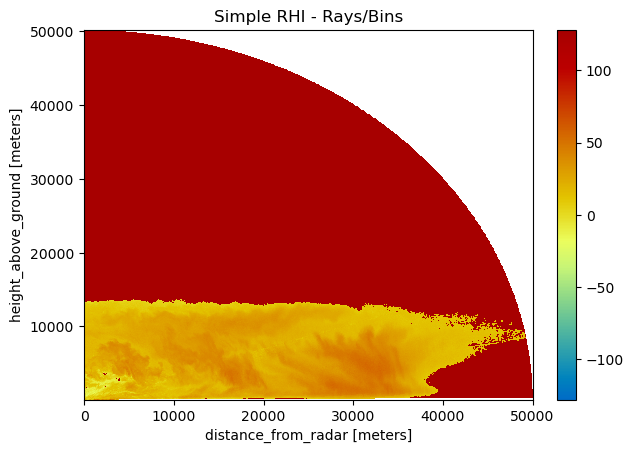

In [4]:
img = img.wrl.georef.georeference()
pm = img.wrl.vis.plot()
txt = plt.title("Simple RHI - Rays/Bins")
# plt.gca().set_xlim(0,100000)
# plt.gca().set_ylim(0,100000)

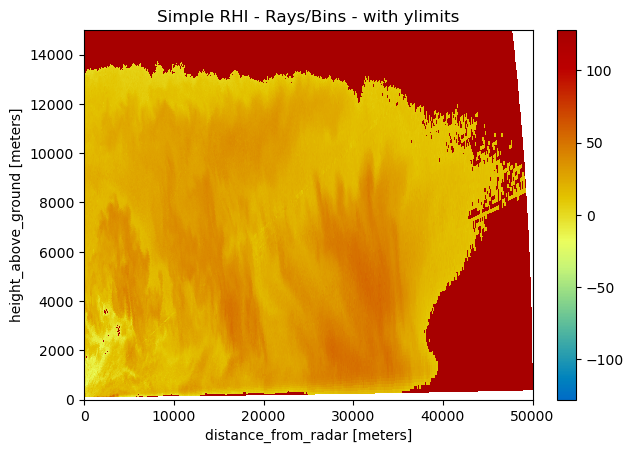

In [5]:
pm = img.wrl.vis.plot()
plt.gca().set_ylim(0, 15000)
txt = plt.title("Simple RHI - Rays/Bins - with ylimits")

Text(0.5, 1.0, 'Curvelineart Grid RHI')

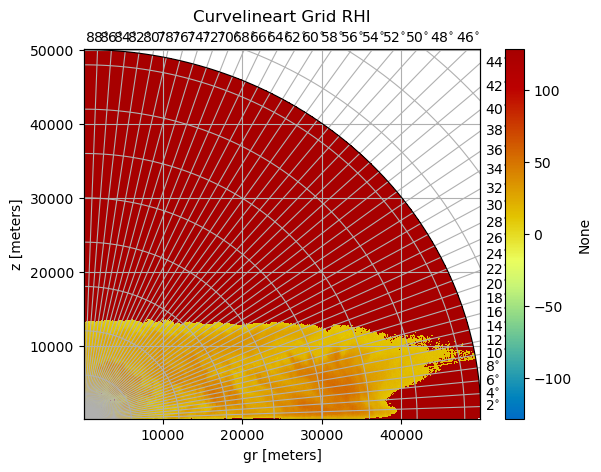

In [6]:
pm = img.wrl.vis.plot(crs="cg")
plt.gca().set_title("Curvelineart Grid RHI", y=1.0, pad=20)

## More decorations and annotations

You can annotate these plots by using standard matplotlib methods.

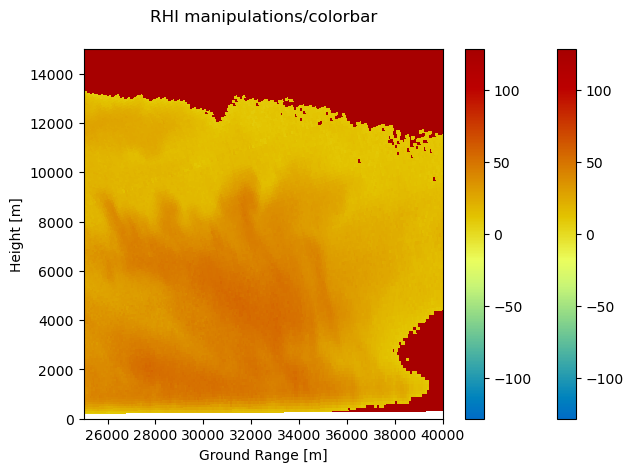

In [7]:
pm = img.wrl.vis.plot()
ax = plt.gca()
ylabel = ax.set_xlabel("Ground Range [m]")
ylabel = ax.set_ylabel("Height [m]")
title = ax.set_title("RHI manipulations/colorbar", y=1, pad=20)
# you can now also zoom - either programmatically or interactively
xlim = ax.set_xlim(25000, 40000)
ylim = ax.set_ylim(0, 15000)
# as the function returns the axes- and 'mappable'-objects colorbar needs, adding a colorbar is easy
cb = plt.colorbar(pm, ax=ax)